In [24]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
from scipy.integrate import dblquad

The physics of a spinning top

In [19]:
def f(t):
    return np.sin(t)*np.sqrt(abs(np.cos(t))) / (np.sin(t) + 7/5) - 2*np.sin(t) + 2;

In [20]:
t = np.linspace(-np.pi/2, np.pi/2, 1000)
A = f(t)

(-3.0, 3.0)

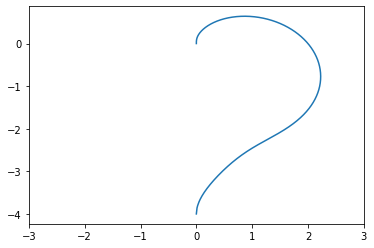

In [21]:
plt.plot(A*np.cos(t), A*np.sin(t))
plt.xlim(-3,3)

$$I = \iiint \rho(x, y, z) |\vec{r}_p|^2 dV = \int_Z \int_r \int_0^{2\pi} \rho(r, z) r^2 r d\phi dr dz = 2 \pi \int_r \int_z \rho(r, z) r^3 dr dz $$

In this $r-z$ plane we can convert to polar coordinates $R = \sqrt{r^2 + z^2}$ and $\beta = \tan^{-1}(z/r)$ and let the edge of the curve by given by $R_E(\beta)$ so that

$$I = 2 \pi \int_{-\pi/2}^{\pi/2} \int_{0}^{R_E(\beta)} \rho(R, \beta) R^4 \cos^3(\beta) dR~d\beta$$

Let $R' = R/R_0$ and $\rho(R, \beta) = \rho_0 h(R, \beta)$ 

$$\boxed{\frac{I}{\rho_0 R_0^5} = 2 \pi \int_{-\pi/2}^{\pi/2} \int_{0}^{R_E'(\beta)} h(R', \beta) R'^4 \cos^3(\beta) dR'~d\beta}$$

Meanwhile the mass is given by

$$M = \iiint \rho(x, y, z)  dV = 2 \pi \int_{-\pi/2}^{\pi/2} \int_{0}^{R_E(\beta)} \rho(R, \beta) R^2 \cos(\beta) dR~d\beta $$

so that

$$ \boxed{\frac{M}{\rho_0 R_0^3} = 2 \pi \int_{-\pi/2}^{\pi/2} \int_{0}^{R_E'(\beta)} h(R, \beta) R'^2 \cos(\beta) dR'~d\beta} $$

Then we can express everything as 

$$ \boxed{\frac{I}{MR^2} = \frac{2 \pi \int_{-\pi/2}^{\pi/2} \int_{0}^{R_E'(\beta)} h(R', \beta) R'^4 \cos^3(\beta) dR'~d\beta}{2 \pi \int_{-\pi/2}^{\pi/2} \int_{0}^{R_E'(\beta)} h(R, \beta) R'^2 \cos(\beta) dR'~d\beta}}$$

In [34]:
def integrand_I(R, beta):
    return R**4 * np.cos(beta)**3
def integrand_M(R, beta):
    return R**2 * np.cos(beta)

**Test Case**: A sphere $h'=1$ and $R_E'(\beta) = 1$

In [36]:
num = dblquad(integrand_I, -np.pi/2, np.pi/2, lambda x:0, lambda x: 1)[0]
dem = dblquad(integrand_M, -np.pi/2, np.pi/2, lambda x:0, lambda x: 1)[0]
I_MR2 = num/dem
print(I_MR2)

0.4000000000000001


Now for the heart curve (for now $h'=1$)

In [37]:
num = dblquad(integrand_I, -np.pi/2, np.pi/2, lambda x:0, lambda x: f(x))[0]
dem = dblquad(integrand_M, -np.pi/2, np.pi/2, lambda x:0, lambda x: f(x))[0]
I_MR2 = num/dem
print(I_MR2)

1.978801714287715
